Anno 2022/2023

Progetto finale Introduzione alla Data Science

Matricola S5018707

In questo progetto lavorerò su due dataset effettuandone l'integrazione, la rappresentazione, e la predizione di certe statistiche attraverso lo studio

Tipi di dataset:

- amazon_titles_1.csv, amazon_titles_2.csv
- amazon_credits.csv

- disney_titles_1.csv, disney_titles_2.csv
- disney_credits.csv

Eseguiamo Import necessari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sklearn as sk


Parto con l'esecuzione della read_csv per creare le tabelle per ogni dataframe

In [2]:
#Amazon

amazon_titles_1 = pd.read_csv("new_data/data/amazon/amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("new_data/data/amazon/amazon_titles_2.csv")

#Disney

disney_titles_1 = pd.read_csv("new_data/data/disney/disney_titles_1.csv")
disney_titles_2 = pd.read_csv("new_data/data/disney/disney_titles_2.csv")


--------------------------------------------------------------------------------------------------------------------------------------
INTEGRAZIONE
--------------------------------------------------------------------------------------------------------------------------------------

Integrazione dei dataframe per ogni piattaforma

In [3]:
# Combino i due dataset usando la concat di pandas

# Per Amazon

amazon_titles_combinata = pd.concat([amazon_titles_1, amazon_titles_2])

# Per Disney

disney_titles_combinata = pd.concat([disney_titles_1, disney_titles_2])



Usando lo spazio apposito per la visualizzazione dei dati si nota che ci sono alcune colonne che rappresentano la stessa cosa con nomi diversi:

(country e production_countries, listed_in e genres, id e show_id, runtime e duration)

Quindi procedo con l'unione delle colonne che rappresentano la stessa cosa e la rimozione di quelle inutili

In [4]:
# Modifico le colonne con nomi diversi ma con lo stesso significato usando la funzione fillna di pandas

# (country e production_countries, listed_in e genres, id e show_id, runtime e duration)

# Amazon

amazon_titles_combinata['country'].fillna(amazon_titles_combinata['production_countries'], inplace=True)

amazon_titles_combinata['genres'].fillna(amazon_titles_combinata['listed_in'], inplace=True)

amazon_titles_combinata['id'].fillna(amazon_titles_combinata['show_id'], inplace=True)

amazon_titles_combinata['duration'].fillna(amazon_titles_combinata['runtime'], inplace=True)

# Disney

disney_titles_combinata['country'].fillna(disney_titles_combinata['production_countries'], inplace=True)

disney_titles_combinata['genres'].fillna(disney_titles_combinata['listed_in'], inplace=True)

disney_titles_combinata['id'].fillna(disney_titles_combinata['show_id'], inplace=True)

disney_titles_combinata['duration'].fillna(disney_titles_combinata['runtime'], inplace=True)


# Poi elimino le colonne che non mi servono più

amazon_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)
disney_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)



Dopo l'unione eseguo uno step di pulizia dei dati per eliminare le righe inutili usando lo spazio dedicato alla rappresentazione delle tabelle

Da tale analisi spuntano, per mio giudizio:

Comunemente ai due dataset

Rimuovo:

- ['seasons'] perchè hanno troppi valori nulli per renderle utili

- ['description','imdb_id','cast','director','imdb_votes'] dato che non rappresentano materia utile per lo studio richiesto dal progetto

Modifico:

- ['type'] perchè guardando le occorrenze di valori della colonna si nota che ci sono quattro tipi('TV Show', 'Movie', 'MOVIE', 'SHOW'), ma per quello che indica la colonna è meglio usarne due('MOVIE', 'SHOW')

Dopo effettuo un drop dei duplicati sulle colonne ['title','release_year'] per eliminare le righe che hanno lo stesso titolo e lo stesso anno di uscita dato che un titolo non può essere pubblicato due volte nello stesso anno, e in questo modo garantisco che i remake di un film vengano considerati come film diversi

In [5]:
#Effettuo il drop delle colonne inutili


amazon_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director','imdb_votes'], axis=1, inplace=True)

disney_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director','imdb_votes'], axis=1, inplace=True)


# Modifica colonna type per definire i due valori assumibili da essa (MOVIE, SHOW)

amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('Movie', 'MOVIE')
amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('TV Show', 'SHOW')

disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('Movie', 'MOVIE')
disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('TV Show', 'SHOW')

# Drop di eventuali duplicati

amazon_titles_combinata.drop_duplicates(subset=['title', 'release_year'], inplace=True, keep='first')

disney_titles_combinata.drop_duplicates(subset=['title', 'release_year'], inplace=True, keep='first')


----------------------------------------------------------------------------------------------------------------
TRASFORMAZIONE
----------------------------------------------------------------------------------------------------------------

Purtroppo non capisco se siano realmente utili gli step di trasformazione assegnati dal progetto, penso che non avrebbe senso sostituire la colonna genres, dal momento che è una colonna che indica il genere del film, con una che ne indica solo il numero, sarebbe meglio aggiungerla a parte

Riguardo al creare colonne contenenti l'anno ed il mese di aggiunta, non ne trovo il motivo visto che la colonna contiene una quantità irrisoria di valori, ma una parte del progetto lo richiede quindi procedo

In [6]:
# Attualmente ci sono dei valori nella colonna genres che sono delle strighe, quindi non posso effettuare il conteggio dei valori in essa contenuti

# Devo trasformare le stringhe in liste

amazon_titles_combinata['genres'] = amazon_titles_combinata['genres'].apply(lambda x: x.split(', '))

# Aggiungo quindi una colonna che prende i valori della colonna genres e ne conta gli elementi inserendo il risultato nella nuova colonna genres_count

amazon_titles_combinata['genres_count'] = amazon_titles_combinata['genres'].apply(lambda x: len(x))

# Stessa cosa per Disney

disney_titles_combinata['genres'] = disney_titles_combinata['genres'].apply(lambda x: x.split(', '))

disney_titles_combinata['genres_count'] = disney_titles_combinata['genres'].apply(lambda x: len(x))


# Qua avrei usato la print per controllare la corretta esecuzione del codice, ma basta far riferimento allo spazio dedicato alla visualizzazione dei dati a fine notebook

# Adesso procedo quindi con la creazione di una nuova colonna che prende il valore della colonna date_added e ne estrae l'anno ed il mese inserendoli in due nuove colonne, non prima di
# creare degli indici che mi saranno utili in seguito, sopratutto quello dei valori non nulli di date_added

index_notn_disney = disney_titles_combinata['date_added'].notnull()

index_notn_amazon = amazon_titles_combinata['date_added'].notnull()

# Creo altri due indici per distinguere i film dalle serie tv per le due piattaforme

index_movie_amazon = amazon_titles_combinata['type'] == 'MOVIE'
index_show_amazon = amazon_titles_combinata['type'] == 'SHOW'

index_movie_disney = disney_titles_combinata['type'] == 'MOVIE'
index_show_disney = disney_titles_combinata['type'] == 'SHOW'

# Formato date_added: gg mm, yyyy

# Amazon

amazon_titles_combinata['year_added'] = amazon_titles_combinata['date_added'].astype(str).str.split(', ').str[-1]
amazon_titles_combinata['month_added'] = amazon_titles_combinata['date_added'].astype(str).str.split(' ').str[0]

# Disney

disney_titles_combinata['year_added'] = disney_titles_combinata['date_added'].astype(str).str.split(', ').str[-1]
disney_titles_combinata['month_added'] = disney_titles_combinata['date_added'].astype(str).str.split(' ').str[0]

# Dopo questo step se si esegue il metodo info() le nuove colonne year_added e month_added non risultano più null ma contengono nan, procedo quindi con il replace con il nan di numpy(che li rende nulli)

amazon_titles_combinata['year_added'] = amazon_titles_combinata['year_added'].replace('nan', np.nan)
amazon_titles_combinata['month_added'] = amazon_titles_combinata['month_added'].replace('nan', np.nan)

disney_titles_combinata['year_added'] = disney_titles_combinata['year_added'].replace('nan', np.nan)
disney_titles_combinata['month_added'] = disney_titles_combinata['month_added'].replace('nan', np.nan)




----------------------------------------------------------------------------------------------------------------
ESPLORAZIONE
----------------------------------------------------------------------------------------------------------------

Durante questo step eseguo qualche rappresentazione grafica per capire meglio i dati che ho a disposizione

- Prima: distribuzione dell'imdb_score per age_certification

- Seconda: numero di programmi per release_year

- Terza: uguale alla seconda ma per date_added

Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

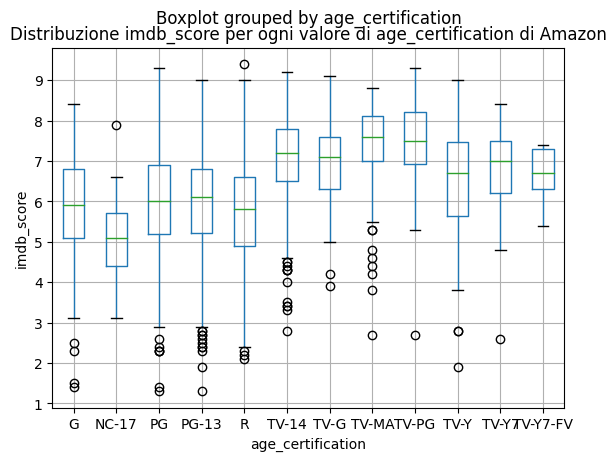

In [8]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification
plt.figure(figsize=(50,40))
amazon_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Amazon')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')


Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

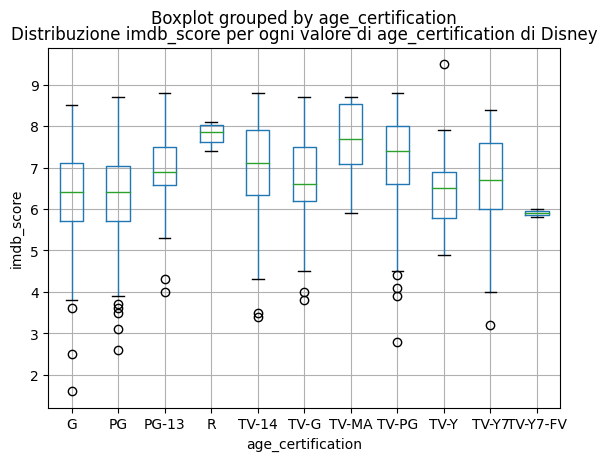

In [9]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification

plt.figure(figsize=(50,40))
disney_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Disney')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')

Text(0, 0.5, 'Numero di programmi')

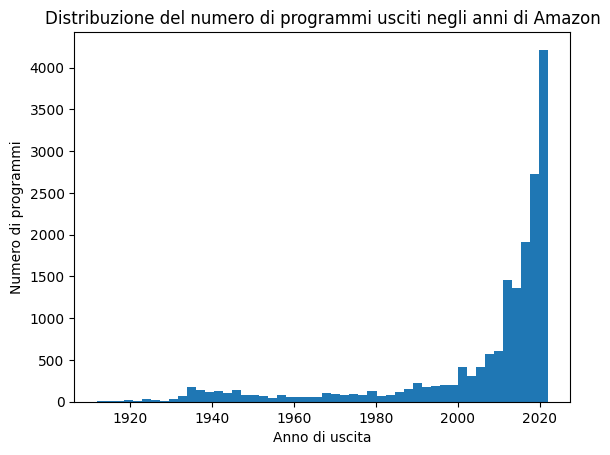

In [10]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(amazon_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

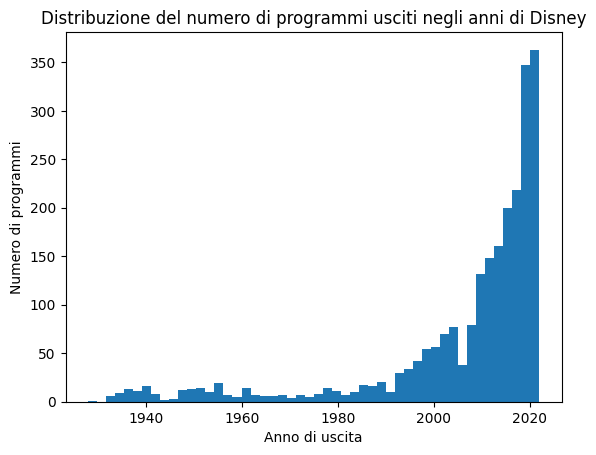

In [11]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(disney_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

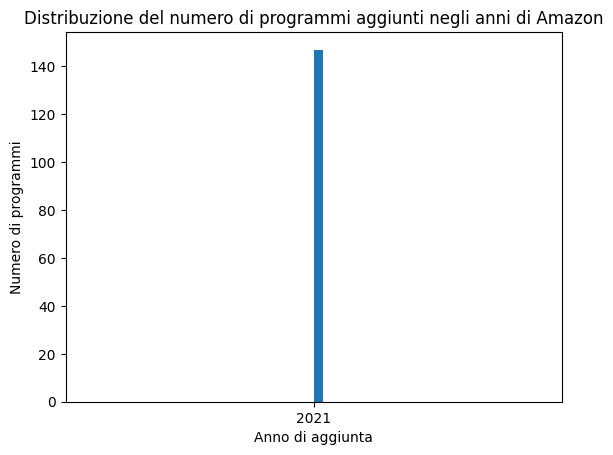

In [12]:
# TERZA

# Rappresento con un istogramma il numero di programmi aggiunti negli anni

plt.figure()
plt.hist(amazon_titles_combinata['year_added'][index_notn_amazon], bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

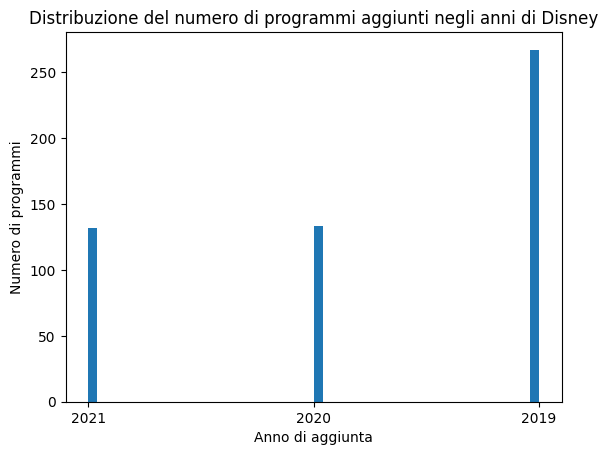

In [13]:
# TERZA

# Visualizzo un istogramma per rappresentare il numero di programmi aggiunti negli anni senza considerare le righe senza un valore

plt.figure()
plt.hist(disney_titles_combinata['year_added'][index_notn_disney], bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


----------------------------------------------------------------------------------------------------------------
TEST STATISTICI
----------------------------------------------------------------------------------------------------------------

In questo passaggio del progetto andremo ad effettuare degli studi sui dati per capire se certe colonne dei due dataset condividono lo stesso comportamento

- Inizialmente controllerò la distribuzione dei MOVIE per anno di produzione rispetto a quelli di aggiunta
- Poi eseguirò lo stesso procedimento sul tipo SHOW
- Infine eseguirò il medesimo test sull'intera base di dati effettuando un join naturale tra i due dataset

In [15]:
# Controllata ogni distribuzione procedo ad effettuare il ttest per verificare se ci sono differenze significative tra le distribuzioni

print('Prendo come ipotesi nulla che le due distribuzioni siano uguali\n')

# Amazon

# Creo due array che contengono i valori di show per anno di aggiunta e per anno di uscita

# show_added_amazon = amazon_titles_combinata[index_show_amazon & index_notn_amazon]['year_added']

# show_released_amazon = amazon_titles_combinata[index_show_amazon]['release_year']

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Amazon\n')

# t, p_val = stats.ttest_ind(show_added_amazon.astype(int), show_released_amazon.astype(int))

# print('t = ' + t.astype(str))
# print('p_value = ' + p_val.astype(str))

print('Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti\n')

# Disney

# Creo due array che contengono i valori di show per anno di aggiunta e per anno di uscita

show_added_disney = disney_titles_combinata[index_show_disney & index_notn_disney]['year_added']

show_released_disney = disney_titles_combinata[index_show_disney]['release_year']

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Disney\n')

t, p_val = stats.ttest_ind(show_added_disney.astype(int), show_released_disney.astype(int))

print('t = ' + t.astype(str))
print('p_value = ' + p_val.astype(str))

print('Il p_value è molto basso, quindi possiamo rifiutare l\'ipotesi nulla e dire che le due distribuzioni sono diverse\n')

# Tipo MOVIE

# Amazon

# Creo due array che contengono i valori di movie per anno di aggiunta e per anno di uscita

# movie_added_amazon = amazon_titles_combinata[index_movie_amazon & index_notn_amazon]['year_added']

# movie_released_amazon = amazon_titles_combinata[index_movie_amazon]['release_year']

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Amazon\n')

# t, p_val = stats.ttest_ind(movie_added_amazon.astype(int), movie_released_amazon.astype(int))

# print('t = ' + t.astype(str))
# print('p_value = ' + p_val.astype(str))


print('Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti\n')

# Disney

# Creo due array che contengono i valori di movie per anno di aggiunta e per anno di uscita

movie_added_disney = disney_titles_combinata[index_movie_disney & index_notn_disney]['year_added']

movie_released_disney = disney_titles_combinata[index_movie_disney]['release_year']

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Disney\n')

t, p_val = stats.ttest_ind(movie_added_disney.astype(int), movie_released_disney.astype(int))

print('t = ' + t.astype(str))
print('p_value = ' + p_val.astype(str))

print('Il p_value è molto basso, quindi possiamo rifiutare l\'ipotesi nulla e dire che le due distribuzioni sono diverse\n')

# Dato che ogni ttest sulla piattaforma amazon ha causato un errore (dato che i dati della colonna date_added erano troppo pochi),
# ho deciso di non effettuarlo sul join tra le due piattaforme anche se richiesto, visto che darebbe lo stesso errore







Prendo come ipotesi nulla che le due distribuzioni siano uguali

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Amazon

Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Disney

t = 9.406138682996882
p_value = 3.6800690540312024e-20
Il p_value è molto basso, quindi possiamo rifiutare l'ipotesi nulla e dire che le due distribuzioni sono diverse

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Amazon

Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di usc

----------------------------------------------------------------------------------------------------------------
OLAP
----------------------------------------------------------------------------------------------------------------

Questo passaggio richiede l'assemblaggio di una matrice tridimensionale avente come dimensioni:

- Age_certification
- Type
- Country

Per adattarle a dimensioni discrete effettuarò delle quantificazioni, ovvero definiremo degli insiemi di appartenenza comuni per i valori correlati assunti delle colonne prese in considerazione

- Quindi rispetto alla colonna age_certification ne definirò una nuova inserendo semplicemente le età in base alla classificazione corrispondente

- La colonna type non necessita di quantizzazione

- La colonna country invece necessita di una quantizzazione, quindi procedo con la creazione di una nuova colonna che contenga i continenti di appartenenza

In [16]:
# Conversioni necessarie per la funzione continent, in questo modo creo una lista per ogni valore della colonna country dopo aver filtrato al meglio la stringa

amazon_titles_combinata['country'] = amazon_titles_combinata['country'].astype(str)

amazon_titles_combinata['country'] = amazon_titles_combinata['country'].str.replace("'", "")

amazon_titles_combinata['country'] = amazon_titles_combinata['country'].str.replace(" ", "")

amazon_titles_combinata['country'] = amazon_titles_combinata['country'].str.replace("[", "")

amazon_titles_combinata['country'] = amazon_titles_combinata['country'].str.replace("]", "")


amazon_titles_combinata['country'] = amazon_titles_combinata['country'].str.split(",")

##############################################################################################

disney_titles_combinata['country'] = disney_titles_combinata['country'].astype(str)

disney_titles_combinata['country'] = disney_titles_combinata['country'].str.replace("'", "")

disney_titles_combinata['country'] = disney_titles_combinata['country'].str.replace(" ", "")

disney_titles_combinata['country'] = disney_titles_combinata['country'].str.replace("[", "")

disney_titles_combinata['country'] = disney_titles_combinata['country'].str.replace("]", "")


disney_titles_combinata['country'] = disney_titles_combinata['country'].str.split(",")

##############################################################################################

# Dati alcuni dubbi sorti in seguito alla OLAP corrispondente decido di 'filtrare' anche i dati della colonna age_certification

amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].astype(str)

amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace("'", "")

amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace("[", "")

amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace("]", "")

amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace("nan", "Not Rated")

# Anche per la piattaforma Disney

disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].astype(str)

disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace("'", "")

disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace("[", "")

disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace("]", "")

disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace("nan", "Not Rated")






In [20]:
# Qua definisco la colonna age_certification_quant effettuando le conversioni in età per ogni valore di age_certification

# Per controllare le appartenenze creo liste con il nome dell'insieme a cui appartenere

# Creo liste con gli insiemi di età

All_years_age = ['G', 'TV-G', 'TV-Y']
Adults_age = ['R', 'TV-MA', 'NC-17']
Mature_age = ['TV-14']
Teens_age = ['PG-13']
Older_kids_age = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']

# Creo la funzione che controlli la fascia d'età corrispondente

def age_certification_quant(age_certification):
    if age_certification in All_years_age:
        return '0+'
    elif age_certification in Adults_age:
        return '18+'
    elif age_certification in Mature_age:
        return '16+'
    elif age_certification in Teens_age:
        return '13+'
    elif age_certification in Older_kids_age:
        return '7+'
    else:
        return 'Not Rated'

# liste con continenti per controllare le appartenenze dei valori di country, solo sigle

Africa = ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'CI', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'YT', 'MA', 'MZ', 'NA', 'NE', 'NG', 'ST', 'RE', 'RW', 'SH', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW']
Asia = ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CX', 'CC', 'IO', 'GE', 'HK', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KP', 'KR', 'KW', 'KG', 'LA', 'LB', 'MO', 'MY', 'MV', 'MN', 'MM', 'NP', 'OM', 'PK', 'PS', 'PH', 'QA', 'SA', 'SG', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE']
Europe = ['AX', 'AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FO', 'FI', 'FR', 'DE', 'GI', 'GR', 'GG', 'VA', 'HU', 'IS', 'IE', 'IM', 'IT', 'JE', 'LV', 'LI', 'LT', 'LU', 'MK', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SJ', 'SE', 'CH', 'UA', 'GB', 'UK']
America = ['AI', 'AG', 'AR', 'AW', 'BS', 'BB', 'BZ', 'BM', 'BO', 'BQ', 'BV', 'BR', 'CA', 'KY', 'CL', 'CO', 'CR', 'CU', 'CW', 'DM', 'DO', 'EC', 'SV', 'FK', 'GF', 'GL', 'GD', 'GP', 'GT', 'GY', 'HT', 'HN', 'JM', 'MQ', 'MX', 'MS', 'NI', 'PA', 'PY', 'PE', 'PR', 'BL', 'KN', 'LC', 'MF', 'PM', 'VC', 'SX', 'GS', 'SR', 'TT', 'TC', 'US', 'UY', 'VE', 'VG', 'VI']
Oceania = ['AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU', 'NF', 'MP', 'PW', 'PG', 'PN', 'WS', 'SB', 'TK', 'TO', 'TV', 'UM', 'VU', 'WF']

# liste con continenti e stati scritti per esteso

Africa_full = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Réunion', 'Rwanda', 'Saint Helena, Ascension and Tristan da Cunha', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']
Asia_full = ['Afghanistan', 'Arabia Saudita', 'Armenia', 'Azerbaigian', 'Bangladesh', 'Birmania', 'Cambogia', 'Cina', 'Corea del Nord', 'Corea del Sud', 'Emirati Arabi Uniti', 'Filippine', 'Georgia', 'Giappone', 'Giordania', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israele', 'Kazakistan', 'Kirghizistan', 'Kuwait', 'Laos', 'Libano', 'Macao', 'Malesia', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Palestina', 'Qatar', 'Russia', 'Singapore', 'Siria', 'Sri Lanka', 'Tagikistan', 'Tailandia', 'Taiwan', 'Timor Est', 'Turchia', 'Turkmenistan', 'Uzbekistan', 'Vietnam', 'Yemen']
Europe_full = ['Albania','Austria', 'Belgio', 'Bielorussia', 'Bosnia ed Erzegovina', 'Bulgaria', 'Repubblica Ceca', 'Cecoslovacchia', 'Cipro', 'Croazia', 'Danimarca', 'Estonia', 'Finlandia', 'Francia', 'Georgia', 'Germania', 'Grecia', 'Repubblica del Monte Athos', 'Irlanda', 'Islanda', 'Italia', 'Jugoslavia', 'Kosovo', 'Lituania', 'Lussemburgo', 'Macedonia', 'Malta', 'Moldavia', 'Monaco', 'Montenegro', 'Paesi Bassi', 'Norvegia', 'Polonia', 'Portogallo', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovacchia', 'Slovenia', 'Spagna', 'Svezia', 'Svizzera', 'Ucraina', 'Regno Unito', 'Gran Bretagna', 'Inghilterra', 'Scozia', 'Galles', 'Irlanda del Nord']
America_full = ['Antigua e Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brasile', 'Canada', 'Cile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Giamaica', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Messico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Repubblica Dominicana', 'Saint Kitts e Nevis', 'Saint Vincent e Grenadine', 'Saint Lucia', 'Suriname', 'Trinidad e Tobago', 'Uruguay', 'Venezuela']
Oceania_full = ['Australia', 'Fiji', 'Kiribati', 'Isole Marshall', 'Micronesia', 'Nauru', 'Nuova Zelanda', 'Palau', 'Papua Nuova Guinea', 'Isole Salomone', 'Samoa', 'Timor Est', 'Tonga', 'Tuvalu', 'Vanuatu']

# Quindi definisco la funzione che controlli il continente di appartenenza della lista di valori di country, prima controlla le sigle poi, se non trova corrispondenze, controlla i nomi per esteso
# quando trova una corrispondenza, incrementa il contatore del continente corrispondente nel dizionario continents_counters

def continent(country):
    continents_counters = {'Africa': 0, 'Asia': 0, 'Europe': 0, 'America': 0, 'Oceania': 0}
    for x in country:
        if x in Africa:
            continents_counters['Africa'] += 1
            
        elif x in Asia:
            continents_counters['Asia'] += 1
            
        elif x in Europe:
            continents_counters['Europe'] += 1
            
        elif x in America:
            continents_counters['America'] += 1
            
        elif x in Oceania:
            continents_counters['Oceania'] += 1
            
        elif x in Africa_full:
            continents_counters['Africa'] += 1
            
        elif x in Asia_full:
            continents_counters['Asia'] += 1
            
        elif x in Europe_full:
            continents_counters['Europe'] += 1
            
        elif x in America_full:
            continents_counters['America'] += 1
            
        elif x in Oceania_full:
            continents_counters['Oceania'] += 1

    return maxcounter(continents_counters)
        
# Funzione che restituisce l'elemento con il valore più alto in un dizionario

def maxcounter(dizionario):
    max = 0
    max_key = ''
    for x in dizionario:
        if dizionario[x] > max:
            max = dizionario[x]
            max_key = x
    return max_key


# Quindi con la funzione apply applico la funzione che mi dovrebbe restituire la fascia d'età per age_certification ed il continente di appartenenza per country

amazon_titles_combinata['age_certification_quant'] = amazon_titles_combinata['age_certification'].apply(lambda x: age_certification_quant(x))

disney_titles_combinata['age_certification_quant'] = disney_titles_combinata['age_certification'].apply(lambda x: age_certification_quant(x))


amazon_titles_combinata['country_quant'] = amazon_titles_combinata['country'].apply(lambda x: continent(x))

disney_titles_combinata['country_quant'] = disney_titles_combinata['country'].apply(lambda x: continent(x))


In [21]:
# Adesso posso creare le OLAP

# Amazon

quantize_age = ['0+','7+','13+','16+','18+', 'Not Rated']
quantize_continent = ['Africa','Asia','Europe','America','Oceania']
quantize_type = ['MOVIE','SHOW']

OLAP_amazon = np.zeros((6,5,2))
for z in range(0,len(quantize_type)):
  aux = amazon_titles_combinata[amazon_titles_combinata['type']==quantize_type[z]]
  for j in range(0,len(quantize_continent)):
    for i in range(0,len(quantize_age)):
      OLAP_amazon[i,j,z] = np.sum((aux['age_certification_quant'] == quantize_age[i]) &(aux['country_quant'] == quantize_continent[j]))

# Disney

OLAP_disney = np.zeros((6,5,2))
for z in range(0,len(quantize_type)):
  aux = disney_titles_combinata[disney_titles_combinata['type']==quantize_type[z]]
  for j in range(0,len(quantize_continent)):
    for i in range(0,len(quantize_age)):
      OLAP_disney[i,j,z] = np.sum((aux['age_certification_quant'] == quantize_age[i]) &(aux['country_quant'] == quantize_continent[j]))


In [24]:
# Visualizzo le due OLAP per ogni age rating, tipo MOVIE

print("In ordine: Africa, Asia, Europe, America, Oceania")

print('dicing per age 0+, type Movie, Amazon')
print(OLAP_amazon[0,:,0])

print('dicing per age 0+, type Movie, Disney')
print(OLAP_disney[0,:,0])

print('dicing per age 7+, type Movie, Amazon')
print(OLAP_amazon[1,:,0])

print('dicing per age 7+, type Movie, Disney')
print(OLAP_disney[1,:,0])

print('dicing per age 13+, type Movie, Amazon')
print(OLAP_amazon[2,:,0])

print('dicing per age 13+, type Movie, Disney')
print(OLAP_disney[2,:,0])

print('dicing per age 16+, type Movie, Amazon')
print(OLAP_amazon[3,:,0])

print('dicing per age 16+, type Movie, Disney')
print(OLAP_disney[3,:,0])

print('dicing per age 18+, type Movie, Amazon')
print(OLAP_amazon[4,:,0])

print('dicing per age 18+, type Movie, Disney')
print(OLAP_disney[4,:,0])

print('dicing per age Not Rated, type Movie, Amazon')
print(OLAP_amazon[5,:,0])

print('dicing per age Not Rated, type Movie, Disney')
print(OLAP_disney[5,:,0])



In ordine: Africa, Asia, Europe, America, Oceania
dicing per age 0+, type Movie, Amazon
[  3.  72.  41. 119.   4.]
dicing per age 0+, type Movie, Disney
[  1.  10.  14. 385.   3.]
dicing per age 7+, type Movie, Amazon
[  2. 113.  98. 335.   5.]
dicing per age 7+, type Movie, Disney
[  0.   4.  29. 366.   1.]
dicing per age 13+, type Movie, Amazon
[  6.  85. 132. 418.  11.]
dicing per age 13+, type Movie, Disney
[  1.   2.  15. 101.   1.]
dicing per age 16+, type Movie, Amazon
[0. 0. 0. 0. 0.]
dicing per age 16+, type Movie, Disney
[0. 0. 0. 0. 0.]
dicing per age 18+, type Movie, Amazon
[ 13.  81. 294. 912.  18.]
dicing per age 18+, type Movie, Disney
[0. 0. 0. 4. 0.]
dicing per age Not Rated, type Movie, Amazon
[ 169. 1307.  902. 3932.   91.]
dicing per age Not Rated, type Movie, Disney
[  3.   9.  29. 306.   7.]


Text(0.5, 1.0, 'Slicing per type Movie, Amazon')

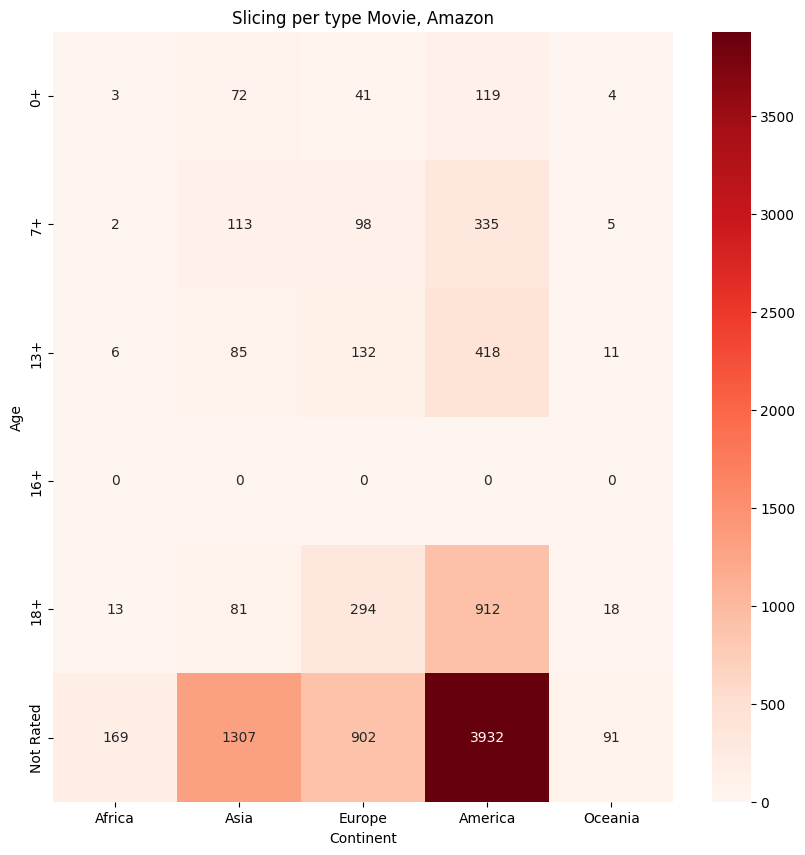

In [25]:
# Visualizzo la heatmap per type Movie

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(OLAP_amazon[:,:,0], annot=True, fmt='g', ax=ax, cmap='Reds')
ax.set_xticklabels(quantize_continent)
ax.set_yticklabels(quantize_age)
ax.set_xlabel('Continent')
ax.set_ylabel('Age')
plt.title('Slicing per type Movie, Amazon')


Text(0.5, 1.0, 'Slicing per type Show, Amazon')

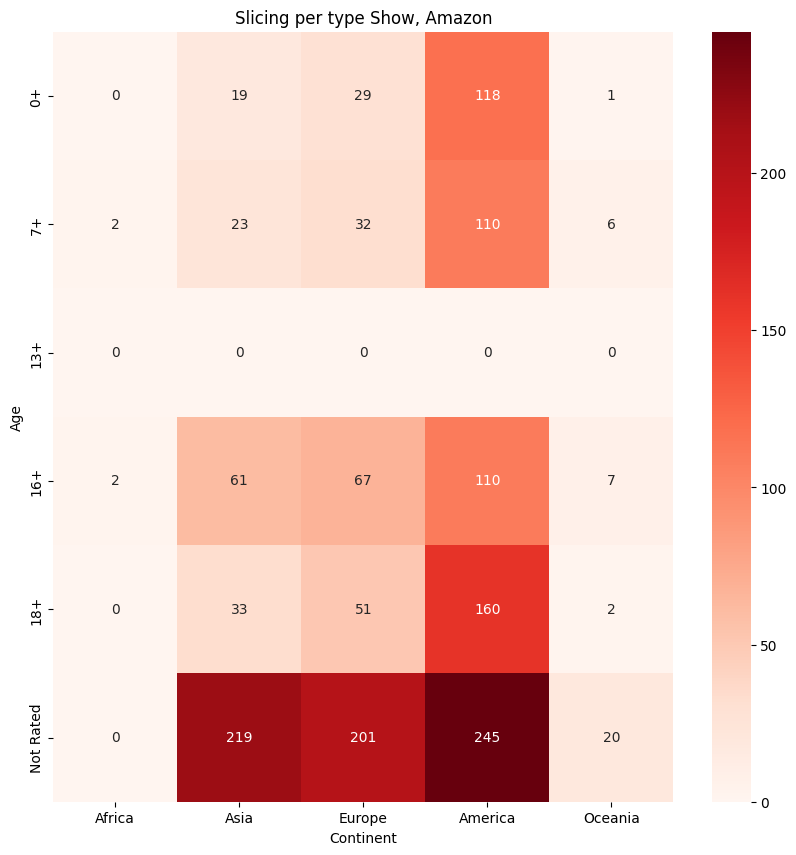

In [26]:
#Visualizzo la heatmap per type Show con titolo Amazon

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(OLAP_amazon[:,:,1], annot=True, fmt='g', ax=ax, cmap='Reds')
ax.set_xticklabels(quantize_continent)
ax.set_yticklabels(quantize_age)
ax.set_xlabel('Continent')
ax.set_ylabel('Age')
plt.title('Slicing per type Show, Amazon')



Text(0.5, 1.0, 'Slicing per type Movie, Disney')

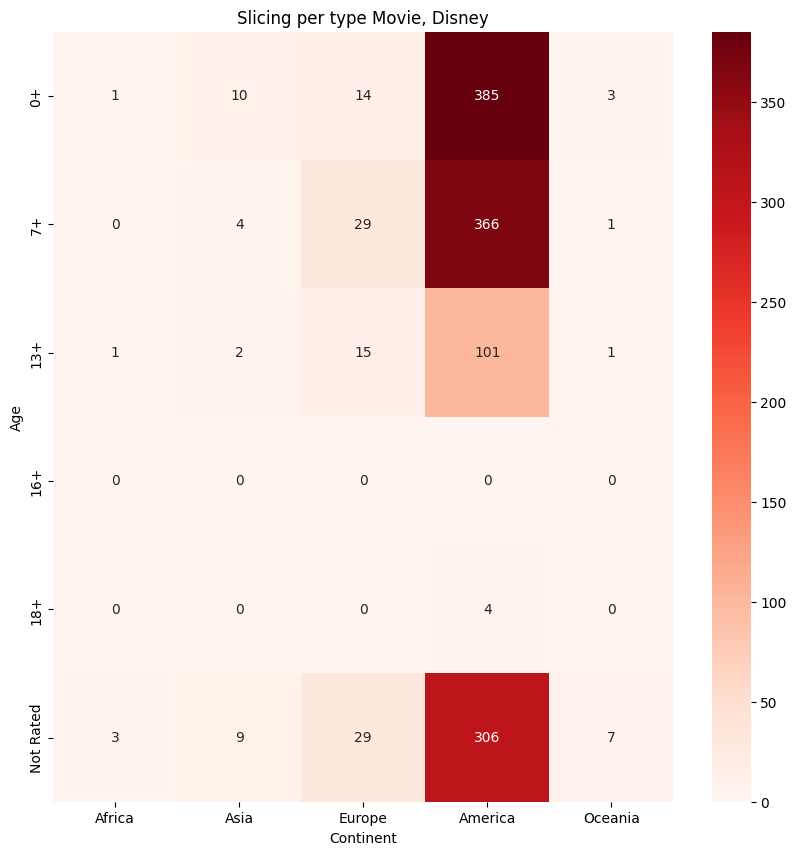

In [27]:
# Slicing per type Movie, Disney

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(OLAP_disney[:,:,0], annot=True, fmt='g', ax=ax, cmap='Reds')
ax.set_xticklabels(quantize_continent)
ax.set_yticklabels(quantize_age)
ax.set_xlabel('Continent')
ax.set_ylabel('Age')
plt.title('Slicing per type Movie, Disney')

Text(0.5, 1.0, 'Slicing per type Show, Disney')

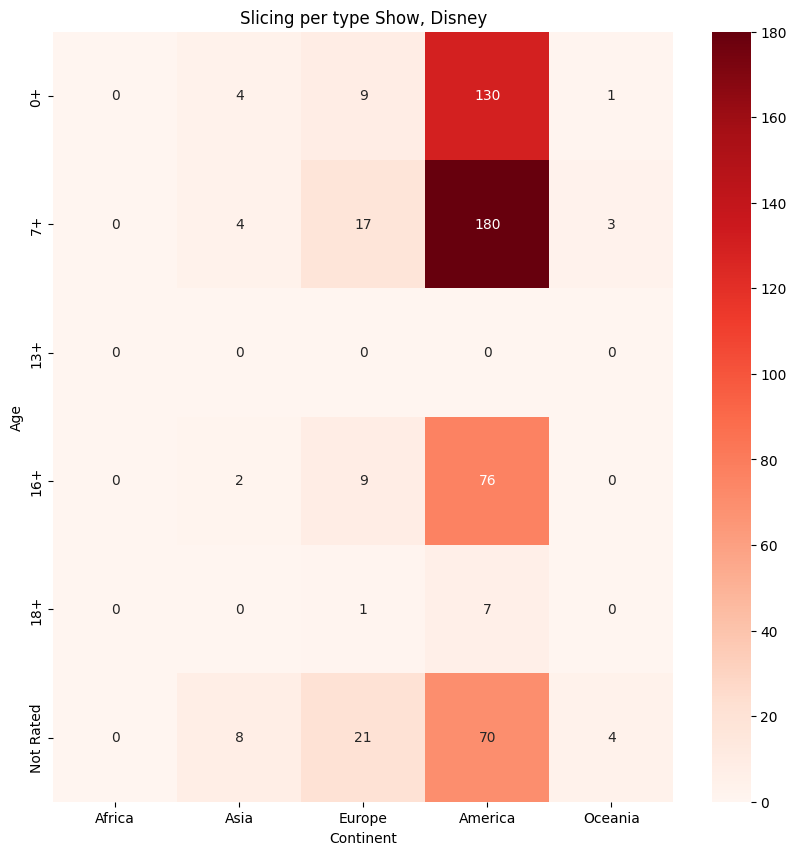

In [28]:
# Slicing per type Show, Disney

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(OLAP_disney[:,:,1], annot=True, fmt='g', ax=ax, cmap='Reds')
ax.set_xticklabels(quantize_continent)
ax.set_yticklabels(quantize_age)
ax.set_xlabel('Continent')
ax.set_ylabel('Age')
plt.title('Slicing per type Show, Disney')

Osservazioni:

- Da queste rappresentazioni si può notare che il continente in cui vengono maggiormente prodotti film e serie tv è l'America, a cui seguono l'Asia e l'Europa, mentre Oceania e Africa sono praticamente assenti

- Si vede anche che l'America tende, guardando gli slicing per Disney, ad avere film con age rating più basso rispetto a quello degli show, oltre al fatto di esercitare praticamente una sorta di monopolio nella produzione di film e show per la piattaforma

- Dagli slicing per Amazon la situazione vede sempre l'America al primo posto a livello di produzione, Europa seconda e Asia terza, con prevalenza di age rating 18+ sia nei film che negli show, ma con differenze molto meno marcate con gli altri continenti rispetto a Disney, a dispetto di Oceania e Africa di cui la produzione è praticamente nulla in ogni piattaforma

- Da ogni slicing effettuato si vede che una buona dei programmi non ha un age rating sopratutto nello slicing movie per amazon da parte dell'America, a cui sono secondi l'Europa e l'Asia,
nella piattaforma disney in ogni slicing diminuisce il rapporto fra i valori senza e con age rating

- Ultima cosa è che si nota che un certo age rating, 13+ per Show e 16+ per Movie, è assente in tutte e due le piattaforme

----------------------------------------------------------------------------------------------------------------
METODI PREDITTIVI
----------------------------------------------------------------------------------------------------------------

In questo passaggio del progetto andremo ad effettuare dei test per capire se è possibile predire il tipo di contenuto in base a certe colonne:

- imdb_score
- tmdb_score
- tmdb_popularity
- duration

Da queste colonne cerchiamo di predire il tipo di contenuto, quindi se sia MOVIE o SHOW

               type  tmdb_score
type        1.00000     0.26945
tmdb_score  0.26945     1.00000


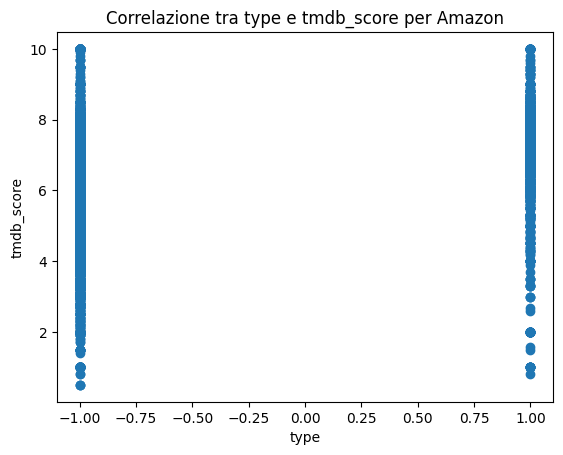

                type  tmdb_score
type        1.000000    0.233486
tmdb_score  0.233486    1.000000


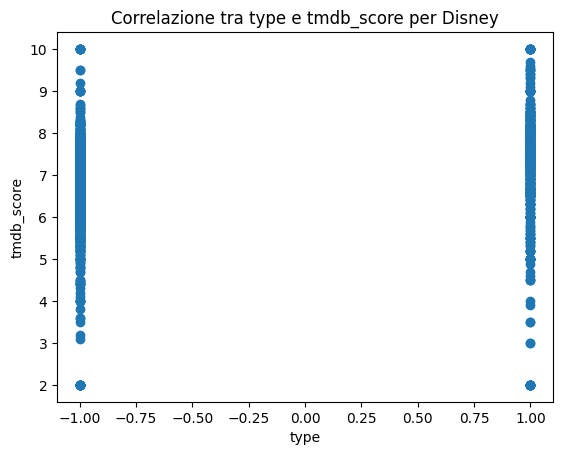

                type  imdb_score
type        1.000000    0.344523
imdb_score  0.344523    1.000000


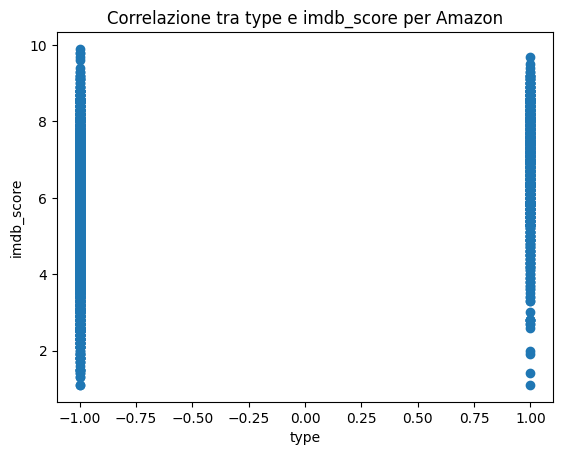

                type  imdb_score
type        1.000000    0.212681
imdb_score  0.212681    1.000000


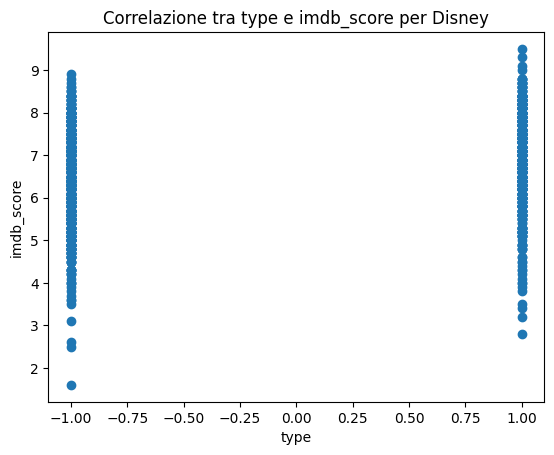

                     type  tmdb_popularity
type             1.000000         0.107446
tmdb_popularity  0.107446         1.000000


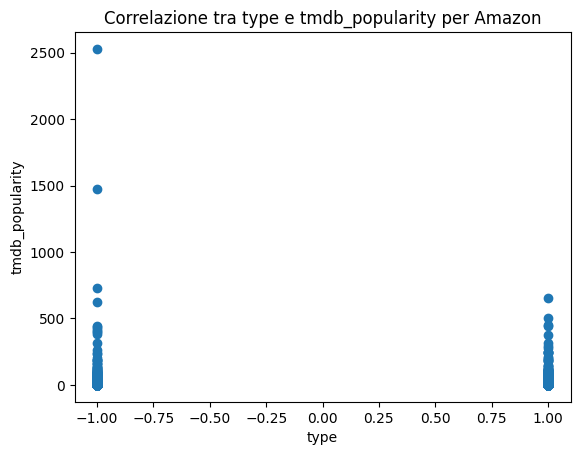

                     type  tmdb_popularity
type             1.000000         0.006879
tmdb_popularity  0.006879         1.000000


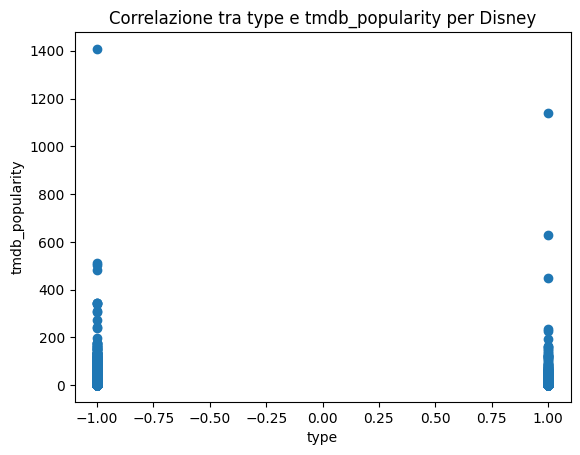

Indice di correlazione
          duration      type
duration  1.000000 -0.644758
type     -0.644758  1.000000


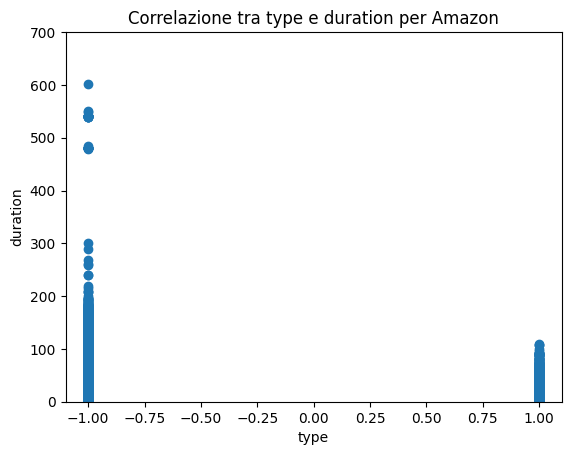

Indice di correlazione
          duration      type
duration  1.000000 -0.547639
type     -0.547639  1.000000


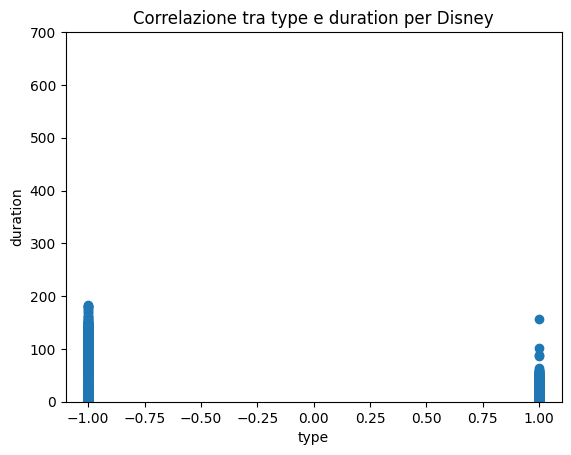

In [29]:
# Pulizia colonna duration per prendere esclusivamente il numero

# Per l'apply occorre prima convertire in stringa

amazon_titles_combinata['duration'] = amazon_titles_combinata['duration'].astype(str)

disney_titles_combinata['duration'] = disney_titles_combinata['duration'].astype(str)

# Poi applicare la funzione

amazon_titles_combinata['duration'] = amazon_titles_combinata['duration'].apply(lambda x: x.split(' ')[0])

disney_titles_combinata['duration'] = disney_titles_combinata['duration'].apply(lambda x: x.split(' ')[0])

# Poi convertire in numeri

amazon_titles_combinata['duration'] = amazon_titles_combinata['duration'].astype(float)

disney_titles_combinata['duration'] = disney_titles_combinata['duration'].astype(float)

# converto la colonna type in numeri 0 o 1

amazon_titles_combinata['type'] = amazon_titles_combinata['type'].apply(lambda x: -1 if x == 'MOVIE' else 1)

disney_titles_combinata['type'] = disney_titles_combinata['type'].apply(lambda x: -1 if x == 'MOVIE' else 1)

# Partiamo dall'individuare una correlazione tra type e tmdb_score

# Prima per Amazon

plt.scatter(amazon_titles_combinata['type'], amazon_titles_combinata['tmdb_score'])
print(amazon_titles_combinata[['type','tmdb_score']].corr())
plt.title('Correlazione tra type e tmdb_score per Amazon')

plt.xlabel('type')
plt.ylabel('tmdb_score')
plt.show()

# Poi per Disney

plt.scatter(disney_titles_combinata['type'], disney_titles_combinata['tmdb_score'])
print(disney_titles_combinata[['type','tmdb_score']].corr())
plt.title('Correlazione tra type e tmdb_score per Disney')

plt.xlabel('type')
plt.ylabel('tmdb_score')
plt.show()

# Ora proviamo a vedere se c'è una correlazione tra type e imdb_score

# Prima per Amazon

plt.scatter(amazon_titles_combinata['type'], amazon_titles_combinata['imdb_score'])
print(amazon_titles_combinata[['type','imdb_score']].corr())
plt.title('Correlazione tra type e imdb_score per Amazon')

plt.xlabel('type')
plt.ylabel('imdb_score')
plt.show()

# Poi per Disney

plt.scatter(disney_titles_combinata['type'], disney_titles_combinata['imdb_score'])
print(disney_titles_combinata[['type','imdb_score']].corr())
plt.title('Correlazione tra type e imdb_score per Disney')

plt.xlabel('type')
plt.ylabel('imdb_score')
plt.show()

# Ora proviamo a vedere se c'è una correlazione tra type e tmdb_popularity

# Prima per Amazon

plt.scatter(amazon_titles_combinata['type'], amazon_titles_combinata['tmdb_popularity'])
print(amazon_titles_combinata[['type','tmdb_popularity']].corr())
plt.title('Correlazione tra type e tmdb_popularity per Amazon')

plt.xlabel('type')
plt.ylabel('tmdb_popularity')
plt.show()

# Poi per Disney

plt.scatter(disney_titles_combinata['type'], disney_titles_combinata['tmdb_popularity'])
print(disney_titles_combinata[['type','tmdb_popularity']].corr())
plt.title('Correlazione tra type e tmdb_popularity per Disney')


plt.xlabel('type')
plt.ylabel('tmdb_popularity')
plt.show()

# Ora proviamo a vedere se c'è una correlazione tra type e duration dei movie

# Prima per Amazon

plt.scatter( amazon_titles_combinata['type'], amazon_titles_combinata['duration'])
print("Indice di correlazione")
print(amazon_titles_combinata[['duration','type']].corr())
plt.title('Correlazione tra type e duration per Amazon')

plt.ylim(0, 700) # settato un limite per una visualizzazione migliore

plt.xlabel('type')
plt.ylabel('duration')
plt.show()

# Poi per Disney

plt.scatter( disney_titles_combinata['type'], disney_titles_combinata['duration'])
print("Indice di correlazione")
print(disney_titles_combinata[['duration','type']].corr())
plt.title('Correlazione tra type e duration per Disney')

plt.ylim(0, 700) # settato un limite per una visualizzazione migliore

plt.xlabel('type')
plt.ylabel('duration')
plt.show()


In [30]:
# Dopo aver controllato delle eventuali correlazioni tra le varie colonne, dobbiamo dare un modello di regressione che abbia come dati di training le colonne tmdb_score, imdb_score, tmdb_popularity e duration di amazon e come test quelli di disney
# import utili

# metrics per calcolare l'accuratezza del modello
# LogisticRegression per creare il modello di regressione

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression


# Drop dei nulli per tutte le colonne da considerare dal momento che se ci sono valori nulli in una colonna, non posso fare la regressione (duration no perchè non ha valori nulli)

amazon_titles_combinata = amazon_titles_combinata.dropna(subset=['tmdb_score'])

amazon_titles_combinata = amazon_titles_combinata.dropna(subset=['imdb_score'])

amazon_titles_combinata = amazon_titles_combinata.dropna(subset=['tmdb_popularity'])


disney_titles_combinata = disney_titles_combinata.dropna(subset=['tmdb_score'])

disney_titles_combinata = disney_titles_combinata.dropna(subset=['imdb_score'])

disney_titles_combinata = disney_titles_combinata.dropna(subset=['tmdb_popularity'])

# Adatto la shape[0] di amazon a quella di disney

amazon_titles_combinata = amazon_titles_combinata.head(disney_titles_combinata.shape[0])

# Creo i dataset di training

x_train = amazon_titles_combinata[['tmdb_score','imdb_score','tmdb_popularity','duration']]

y_train = amazon_titles_combinata[['type']]

# Creo i dataset di test

x_test = disney_titles_combinata[['tmdb_score','imdb_score','tmdb_popularity','duration']]

y_test = disney_titles_combinata[['type']]

# Creo modello di regressione logistica dato che si tratta di una classificazione binaria

Log_reg = LogisticRegression()

Log_reg.fit(x_train, y_train)

# Previsioni

y_pred_train = Log_reg.predict(x_train)
y_pred_test = Log_reg.predict(x_test)

# Accuracy, più si avvicina a 1 più è accurato
print("Accuracy sul training set")
print(Log_reg.score(x_train, y_train))
print("Accuracy sul test set")
print(Log_reg.score(x_test, y_test))


Accuracy sul training set
0.9976303317535545
Accuracy sul test set
0.8530805687203792


C:\Users\edoar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


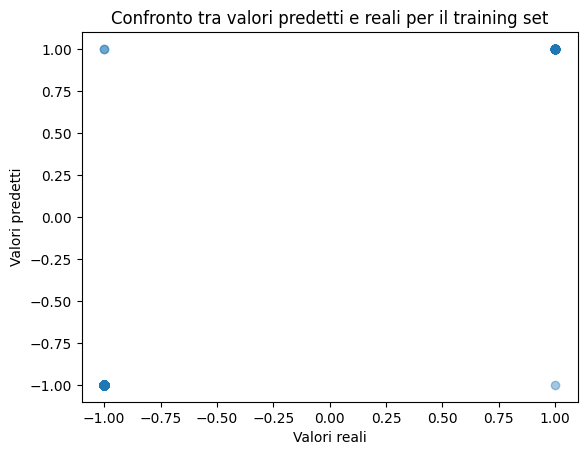

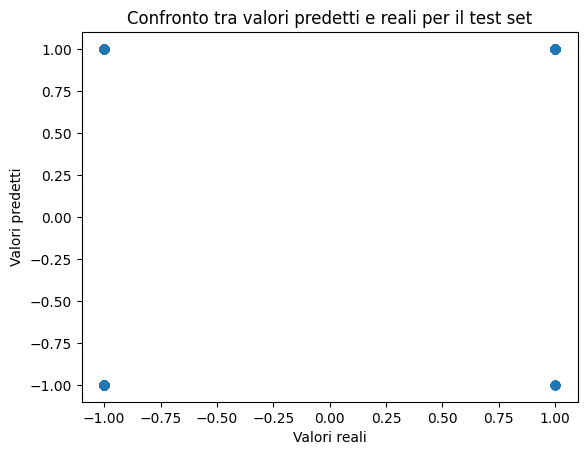

In [31]:

# Quindi con i dati a disposizione costruiamo un grafico che mostri la differenza tra i valori predetti e quelli reali
# Per farlo dobbiamo creare un dataframe che contenga i valori predetti e quelli reali
# Per fare ciò dobbiamo prima creare un dataframe che contenga i valori predetti e poi un dataframe che contenga i valori reali
# dopo di che costruiamo un grafico scatter che mostri la differenza tra i valori predetti e quelli reali

# Creo dataframe che contenga i valori predetti

y_hat_train = pd.DataFrame(y_pred_train, columns=['type'])

y_hat_test = pd.DataFrame(y_pred_test, columns=['type'])

# Creo dataframe che contenga i valori reali

y_train = pd.DataFrame(y_train, columns=['type'])

y_test = pd.DataFrame(y_test, columns=['type'])

# Creo il grafico scatter con i valori messi a confronto

plt.scatter(y_train, y_pred_train, alpha=0.4)
plt.title('Confronto tra valori predetti e reali per il training set')
plt.xlabel('Valori reali')
plt.ylabel('Valori predetti')
plt.show()

plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.title('Confronto tra valori predetti e reali per il test set')
plt.xlabel('Valori reali')
plt.ylabel('Valori predetti')
plt.show()


Dai suddetti grafici si vede la differenza di precisione della predizione, quando infatti il valore reale è -1(SHOW) o 1(MOVIE) nel primo grafico si nota, avendo messo i pallini in trasparenza, che ci sono più valori predetti giustamente rispetto che nel secondo grafico, confermando quindi la diversità di accuracy

In [7]:
###############################################################################################################

# PARTE per visualizzare i dati, utile per me

# Conteggi

# Valori nulli

#print(amazon_titles_1.isnull().sum())
#print(amazon_titles_2.isnull().sum())
#print(disney_titles_1.isnull().sum())
#print(disney_titles_2.isnull().sum())

#print(amazon_titles_combinata['imdb_score'].isnull().sum())
#print(disney_titles_combinata['year_added'].isnull().sum())

# Valori non nulli

#print(amazon_titles_1.notnull().sum())
#print(amazon_titles_2.notnull().sum())
#print(disney_titles_1.notnull().sum())
#print(disney_titles_2.notnull().sum())

#print(amazon_titles_combinata.notnull().sum())
#print(disney_titles_combinata.notnull().sum())

# Valori duplicati per colonna

#print(amazon_titles_1.duplicated().sum())
#print(amazon_titles_2.duplicated().sum())
#print(disney_titles_1.duplicated().sum())
#print(disney_titles_2.duplicated().sum())

#print(amazon_titles_combinata.duplicated().sum())
#print(disney_titles_combinata.duplicated().sum()) 

# Occorrenze di valori per colonna

#print(amazon_titles_1['type'].value_counts())
#print(amazon_titles_2['type'].value_counts())
#print(disney_titles_1['type'].value_counts())
#print(disney_titles_2['type'].value_counts())

#print(amazon_titles_combinata['age_certification'].value_counts())
#print(disney_titles_combinata['age_certification'].value_counts())

# Dettagli sui dataframe

# Valori unici per colonna

#print(amazon_titles_1['type'].unique())
#print(amazon_titles_2['type'].unique())
#print(disney_titles_1['type'].unique())
#print(disney_titles_2['type'].unique())

#print(amazon_titles_combinata['type'].unique())
#print(disney_titles_combinata['age_certification'].unique())

# Singole colonne

#print(amazon_titles_1['type'])
#print(amazon_titles_2['type'])
#print(disney_titles_1['type'])
#print(disney_titles_2['type'])

#print(amazon_titles_combinata['date_added'])
#print(disney_titles_combinata['type'])

# Prime 5 righe

#print(amazon_titles_1.head())
#print(amazon_titles_2.head())
#print(disney_titles_1.head())
#print(disney_titles_2.head())

#print(amazon_titles_combinata['duration'].head())
#print(disney_titles_combinata.head())

# Informazioni generali

#print(amazon_titles_1.info())
#print(amazon_titles_2.info())
#print(disney_titles_1.info())
#print(disney_titles_2.info())

#print(amazon_titles_combinata.info())
#print(disney_titles_combinata.info())

# Descrizione

#print(amazon_titles_1.describe())
#print(amazon_titles_2.describe())
#print(disney_titles_1.describe())
#print(disney_titles_2.describe())

#print(amazon_titles_combinata.describe())
#print(disney_titles_combinata.describe())

# Dimensioni

#print(amazon_titles_1.shape)
#print(amazon_titles_2.shape)
#print(disney_titles_1.shape)
#print(disney_titles_2.shape)

#print(amazon_titles_combinata.shape[0])
#print(disney_titles_combinata.shape[0])

# Lista colonne

#print(amazon_titles_1.columns)
#print(amazon_titles_2.columns)
#print(disney_titles_1.columns)
#print(disney_titles_2.columns)

#print(amazon_titles_combinata.columns)
#print(disney_titles_combinata.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 17566 entries, 0 to 9667
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17566 non-null  object 
 1   title              17566 non-null  object 
 2   type               17566 non-null  object 
 3   release_year       17566 non-null  int64  
 4   age_certification  3633 non-null   object 
 5   genres             17566 non-null  object 
 6   imdb_score         9729 non-null   float64
 7   tmdb_popularity    10251 non-null  float64
 8   tmdb_score         8723 non-null   float64
 9   country            11134 non-null  object 
 10  date_added         147 non-null    object 
 11  rating             6543 non-null   object 
 12  duration           17566 non-null  object 
 13  genres_count       17566 non-null  int64  
 14  year_added         147 non-null    object 
 15  month_added        147 non-null    object 
dtypes: float64(3), int64(2), obj

In [ ]:
# Parte per visualizzare i grafici

# Grafici per visualizzare distribuzioni per i due tipi di titoli per anno di aggiunta

# Amazon

amazon_titles_combinata['year_added'][index_movie_amazon & index_notn_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di aggiunta per Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

amazon_titles_combinata['year_added'][index_show_amazon & index_notn_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di aggiunta per Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

# Disney

disney_titles_combinata['year_added'][index_movie_disney & index_notn_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di aggiunta per Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

disney_titles_combinata['year_added'][index_show_disney & index_notn_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di aggiunta per Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()


# Seconda parte per visualizzazione di grafici

# Grafici per le distribuzioni di titoli dei due tipi per anno di uscita

# Amazon

amazon_titles_combinata['release_year'][index_movie_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di uscita per Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

amazon_titles_combinata['release_year'][index_show_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di uscita per Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

# Disney

disney_titles_combinata['release_year'][index_movie_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di uscita per Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

disney_titles_combinata['release_year'][index_show_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di uscita per Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

###############################################################################################################